Please **submit this Jupyter notebook through Canvas** no later than **Monday November 5 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

**Jordan Earle** (12297127)

**Natasja Wezel** (11027649)

In [26]:
import numpy as np
import matplotlib.pyplot as plt

-----
# Exercise 1
Consider the function $f(x) = \tan(x)$. Because $\tan(x) = \sin(x) / \cos(x)$, we can approximate $f(x)$ using Taylor approximations for $\sin(x)$ and $\cos(x)$:
$$
  \sin(x) \approx x - \frac{1}{6} x^3, \quad \text{and} \quad \cos(x) \approx 1 - \frac{1}{2} x^2.
$$
This gives the approximation
$$
\hat f(x) = \frac{x - \frac{1}{6} x^3}{1 - \frac{1}{2} x^2}.
$$

## (a)
Evaluate $f(x)$ and $\hat f(x)$ at $x = 1$ and $x = 1.4$. Compute the absolute forward error and absolute backward error.

## (b)
Ignore $\hat f(x)$ for now. Compute the relative condition number of $f(x)$ near $x=1$ and near $x=1.4$.

## (c)
Compute the relative condition number of $\hat f(x)$ near $x=1$ and near $x=1.4$.

--------
# Exercise 2
Consider the following finite difference approximations of the second derivative of a function $f(x)$:
$$
\text{Centered FD:} \quad f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2},
$$
$$
\text{Forward FD:} \quad f''(x) \approx \frac{f(x+2h) - 2f(x+h) + f(x)}{h^2}.
$$

## (a)
Consider the function $f(x) = \exp(-2x)$ evaluated at $x = 0.5$. Compute both finite difference approximations for the range $h \in \{1, 10^{-1}, \ldots, 10^{-16}\}$.

In [23]:
x = 0.5
h_list = [] # something from that range?

for i in range(17):
    h_list.append(10**-i)
print(h_list)

def e_func(x):
    return np.exp(-2 * x)

for h in h_list:
    centered_fd = (e_func(x + h) - 2 * e_func(x) + e_func(x - h))/(h**2)
    forward_fd = (e_func(x + 2*h) - 2 * e_func(x + h) + e_func(x))/(h**2)

    print("centered fd, forward fd for h: ", h, centered_fd, forward_fd)

[1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-16]
centered fd, forward fd for h:  1 2.0323100144840245 0.2750432514347999
centered fd, forward fd for h:  0.1 1.476429368653903 1.208798128864452
centered fd, forward fd for h:  0.01 1.4715668159320794 1.4424278406588442
centered fd, forward fd for h:  0.001 1.4715182551916506 1.4685781597467695
centered fd, forward fd for h:  0.0001 1.4715177687474323 1.4712234930325252
centered fd, forward fd for h:  1e-05 1.4715179075253102 1.471487376392133
centered fd, forward fd for h:  1e-06 1.4714340856869512 1.4716561302918763
centered fd, forward fd for h:  1e-07 1.4765966227514584 1.459943277382081
centered fd, forward fd for h:  1e-08 0.5551115123125782 2.775557561562891
centered fd, forward fd for h:  1e-09 0.0 0.0
centered fd, forward fd for h:  1e-10 -5551.115123125782 5551.115123125782
centered fd, forward fd for h:  1e-11 -555111.5123125783 555111.5123125783
centered fd, forw

## (b)
Using the true second derivative $f''(x)$ at $x=0.5$, plot the total error of the two approximations as a function of $h$, like Figure 1.1 of the book by Heath.

c:\python37\lib\site-packages\matplotlib\axes\_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
c:\python37\lib\site-packages\matplotlib\axes\_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


(22204460492.516922, 5000000)

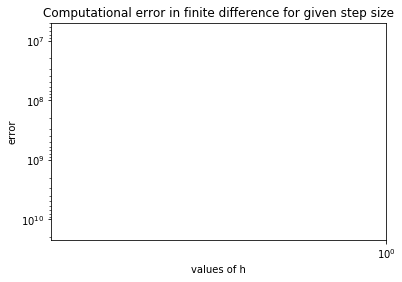

In [53]:
def e_second_d(x):
    return 4 * np.exp(-2 * x)
error_list = []
for h in h_list:
    centered_fd = (e_second_d(x + h) - 2 * e_second_d(x) + e_second_d(x - h))/(h**2)
    forward_fd = (e_second_d(x + 2*h) - 2 * e_second_d(x + h) + e_second_d(x))/(h**2)
    error_list.append(centered_fd + forward_fd)

fig, ax = plt.subplots()
plt.scatter(h_list, error_list)
plt.title("Computational error in finite difference for given step size")
ax.set_xlabel("values of h")
ax.set_ylabel("error")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0,1)
ax.set_ylim(0,5000000)

## (c)
Explain, in words, what you see. How do these approximations compare?

----
# Exercise 3 (Computer exercise 1.13 from the book)
If an amount $a$ is invested at interest rate $r$ compounded $n$ times per year, then the final value $f$ at the end of one year is given by
$$
  f = a (1 + r/n)^n.
$$
This is the familiar formula for _compound interest_. When simple interest, $n=1$. Typically, compounding is done quarterly ($n=4$) or daily ($n=365$). Obviously, the more frequent the compounding, the greater the final amount. But how much difference does this frequency actually make?

## (a)
Write a program that implements the compound interest formula. Test your program using an initial investment of $a=100$, interest rate of 5 percent (so $r=0.05$), and the following values for $n$: $1, 4, 12, 365$.
Do not use Pythons `pow` function, but compute $f$ as $a (1 + r/n) \cdot (1+r/n) \cdot \ldots \cdot (1+r/n)$.

## (b)
We can rewrite $f$ as $f = a \exp(n \log(1 + r/n))$. Using this formula, do the same as in (a).

## (c)
Can you find a value of $n$ such that the formula of (a) becomes unstable? Explain this phenomenon in words.